In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data size
2292910


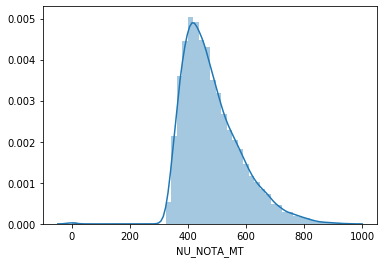

In [29]:
df_train = pd.read_csv('./data/train.csv')
print("data size")
print(df_train.size)
#histogram before cleaning
sns.distplot(df_train['NU_NOTA_MT']);

data size
1692211


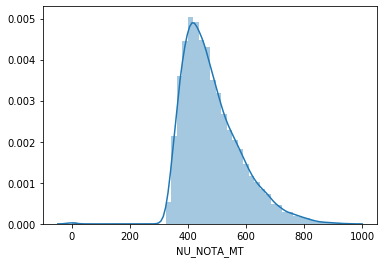

In [30]:
#remove outliers
df_clean = df_train.query('TP_PRESENCA_MT == 1')
print("data size")
print(df_clean.size)
#histogram cleaned
sns.distplot(df_clean['NU_NOTA_MT']);

In [31]:
correct_answers = df_clean['TX_RESPOSTAS_MT']
given_answers = df_clean['TX_GABARITO_MT']
grade = df_clean['NU_NOTA_MT']